# Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import math as mt
import datetime as dt
import timeit 
import requests as req
import seaborn as sns
import plotly.express as px
import matplotlib.gridspec as gridspec

from scipy.stats import chisquare
from io import BytesIO
from matplotlib import pyplot as plt
from scipy import stats as st
from math import factorial
from scipy.stats import norm
from plotly import graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

ALPHA = 0.05
import warnings
warnings.simplefilter("ignore")

# Оглавление <a id='section_0'></a>

## [Загрузка данных и предобработка данных](#section_I)

* [Календарь маркетинговых событий на 2020 год](#section_I.1)
* [Все пользователи, зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 года ](#section_I.2)
* [Все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года](#section_I.3)
* [Таблица участников тестов ](#section_I.4)

## [Объединение данных](#section_2)

* [Провека на одинаковых пользователей тестах](#section_2.11)
* [Проверка временных рамок теста](#section_2.4514)


## [Проверка данных теста](#section_2.55)

* [Оценка количества пользователей в каждой группе](#section_2.532323251)
* [Проверка уникальности пользователей](#section_2.551)
* [Распределение событий на пользователя](#section_2.552)
* [Распределение событий по дням](#section_2.553)

## [Конверсия в воронке на разных этапах](#section_2.5)

* [Визуализация воронки](#section_33333)

## [Анализ A/B-теста](#section_3)

* [Выделение данных для метрик](#section_3.1)
* [Выделение кумулятивных данных по каждой группе](#section_3.2)
* [Построение графика по выручке](#section_3.3)
* [Построение графика по среднему чеку](#section_3.5)
* [Построение графика относительного изменения кумулятивного среднего чека группы B к группе A](#section_3.6)
* [Расчёт и график кумулятивной конверсии по группам](#section_3.7)
* [График относительного изменения кумулятивной конверсии группы B к группе A](#section_3.8)
* [Статистическая значимость различий в среднем чеке между группами](#section_3.9)
* [Статистическая значимость различий в конверсии между группами](#section_3.10)

## [Заключение](#section_4)

# Загрузка данных и предобработка данных<a id='section_I'></a>

### Календарь маркетинговых событий на 2020 год<a id='section_I.1'></a>

In [2]:
ab_project_marketing_events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_project_marketing_events.csv')

In [3]:
ab_project_marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [4]:
ab_project_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
name         14 non-null object
regions      14 non-null object
start_dt     14 non-null object
finish_dt    14 non-null object
dtypes: object(4)
memory usage: 576.0+ bytes


Приведем к данные к нижнему регистру

In [5]:
ab_project_marketing_events['name'] = ab_project_marketing_events['name'].str.lower()
ab_project_marketing_events['regions'] = ab_project_marketing_events['regions'].str.lower()

Ищем дупликаты

In [6]:
ab_project_marketing_events.duplicated().sum()

0

Приведем к нужным типам данных

In [7]:
ab_project_marketing_events['start_dt'] = (pd.
                                   to_datetime(ab_project_marketing_events['start_dt'], 
                                               format='%Y-%m-%dT')) 
ab_project_marketing_events['finish_dt'] = (pd.
                                   to_datetime(ab_project_marketing_events['finish_dt'], 
                                               format='%Y-%m-%dT')) 

### Все пользователи, зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 года <a id='section_I.2'></a>

In [8]:
final_ab_new_users = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_new_users.csv')

In [9]:
final_ab_new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [10]:
final_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
user_id       61733 non-null object
first_date    61733 non-null object
region        61733 non-null object
device        61733 non-null object
dtypes: object(4)
memory usage: 1.9+ MB


Приведем к данные к нижнему регистру

In [11]:
final_ab_new_users['region'] = final_ab_new_users['region'].str.lower()
final_ab_new_users['device'] = final_ab_new_users['device'].str.lower()

Ищем дупликаты

In [12]:
final_ab_new_users.duplicated().sum()

0

Приведем к нужным типам данных

In [13]:
final_ab_new_users['first_date'] = (pd.
                                   to_datetime(final_ab_new_users['first_date'], 
                                               format='%Y-%m-%dT')) 


### Все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года <a id='section_I.3'></a>

In [14]:
final_ab_events = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_events.csv')

In [15]:
final_ab_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [16]:
final_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
user_id       440317 non-null object
event_dt      440317 non-null object
event_name    440317 non-null object
details       62740 non-null float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


In [17]:
final_ab_events['event_name'].value_counts()

login           189552
product_page    125563
purchase         62740
product_cart     62462
Name: event_name, dtype: int64

In [18]:
final_ab_events['details_bool'] = final_ab_events['details'].isnull()

In [19]:
final_ab_events.query('details_bool == 1')['event_name'].value_counts()

login           189552
product_page    125563
product_cart     62462
Name: event_name, dtype: int64

Есть большое количество пропусков в столбце details. Они появляются так как нет деталей по операциям login, product_page, product_cart.

In [20]:
final_ab_events = final_ab_events.drop('details_bool', axis=1)

Заполним пропуски для удобства работы

In [21]:
final_ab_events = final_ab_events.fillna(0)

Ищем дупликаты

In [22]:
final_ab_events.duplicated().sum()

0

Нет дупликатов

Приведем к нужным типам данных значения времени

In [23]:
final_ab_events['event_dt'] = (pd.
                               to_datetime
                               (final_ab_events['event_dt'],
                                format='%Y-%m-%dT')) 
 

### Таблица участников тестов <a id='section_I.4'></a>

In [24]:
final_ab_participants = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_participants.csv')

In [25]:
final_ab_participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


In [26]:
final_ab_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
user_id    18268 non-null object
group      18268 non-null object
ab_test    18268 non-null object
dtypes: object(3)
memory usage: 428.3+ KB


Пропусков нет

Ищем дупликаты

In [27]:
final_ab_participants.duplicated().sum()

0

Преобразование типов не требуется, повторов и пропусков нет.

# Объединение данных <a id='section_2'></a>

В данных имеются два теста

In [28]:
final_ab_participants['ab_test'].value_counts()

interface_eu_test          11567
recommender_system_test     6701
Name: ab_test, dtype: int64

### Провека на одинаковых пользователей тестах  <a id='section_2.11'></a>

Выделим данные по дополнительному тесту

In [29]:
final_ab_participants_interface_eu_test = final_ab_participants.query('ab_test == "interface_eu_test"')

Выделим данные по целевому AB-тесту

In [30]:
final_ab_participants_test = final_ab_participants.query('ab_test == "recommender_system_test"')

In [31]:
user_id_final_ab_participants_interface_eu_test = final_ab_participants_interface_eu_test['user_id'].unique()

In [32]:
user_id_final_ab_participants_test = final_ab_participants_test['user_id'].unique()

Проверим на сходство

In [33]:
del_lis_user = []
for user_name in user_id_final_ab_participants_test:
    if user_name in  user_id_final_ab_participants_interface_eu_test:
        del_lis_user.append(user_name)

In [34]:
final_ab_participants_test.index = final_ab_participants_test['user_id']

Удалим пользователей находящихся в двух тестах сразу

In [35]:
final_ab_participants_test = final_ab_participants_test.drop(del_lis_user, axis=0) 

In [36]:
final_ab_participants_test = final_ab_participants_test.drop(['user_id'],  axis=1) 

In [37]:
final_ab_participants_test = final_ab_participants_test.reset_index()

In [38]:
final_ab_participants_test.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,482F14783456D21B,B,recommender_system_test
3,4FF2998A348C484F,A,recommender_system_test
4,7473E0943673C09E,A,recommender_system_test


Проверим пользователей на уникальность

In [39]:
final_ab_participants_test['user_id'].value_counts()

6166273FF727F34F    1
73B8260CB2EC2469    1
08E17E11A2BD8CF9    1
876918802E20EE1C    1
83F4A600114DB3CF    1
                   ..
36FDEFCF5AB2F663    1
F5D6BFBBC749C924    1
ED0C78CCC155B1E8    1
5813F642DCC5984A    1
42ECCBA921AFE086    1
Name: user_id, Length: 5099, dtype: int64

Объединим данные и удалим те строки, в которых будут пропуски, т.к. это будет означать отсутсnвие этих пользователей в целевом тесте.

In [40]:
final_ab_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [41]:
final_ab_participants_test.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,482F14783456D21B,B,recommender_system_test
3,4FF2998A348C484F,A,recommender_system_test
4,7473E0943673C09E,A,recommender_system_test


In [42]:
final_ab_data = final_ab_events.merge(final_ab_participants_test, 
                                      on = 'user_id', 
                                      how = 'inner')

In [43]:
final_ab_data.head()

,user_id,event_dt,event_name,details,group,ab_test
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,A,recommender_system_test
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,A,recommender_system_test
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.00,A,recommender_system_test
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.00,A,recommender_system_test


Объединим с данными о новых клиентах, чтобы зенать, количество прибывших людей

In [44]:
final_ab_data = final_ab_data.merge(final_ab_new_users, 
                                      on = 'user_id', 
                                      how = 'left')

In [45]:
final_ab_data.head()

,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test,2020-12-07,eu,android
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,A,recommender_system_test,2020-12-07,eu,android
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,A,recommender_system_test,2020-12-07,eu,android
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.00,A,recommender_system_test,2020-12-07,eu,android
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.00,A,recommender_system_test,2020-12-07,eu,android


In [46]:
final_ab_data['region'].value_counts()

eu           17526
n.america      838
apac           232
cis            208
Name: region, dtype: int64

В данных большинство клиентов представлено из Европы, так же тест проводится на покупателях из этого региона. Для того чтобы избежать выбросов и некорректных сравнений, оставим в датасете пользователей только из Европы

In [47]:
final_ab_data = final_ab_data.query('region == "eu"')

In [48]:
final_ab_data.head()

,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test,2020-12-07,eu,android
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,A,recommender_system_test,2020-12-07,eu,android
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,A,recommender_system_test,2020-12-07,eu,android
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.00,A,recommender_system_test,2020-12-07,eu,android
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.00,A,recommender_system_test,2020-12-07,eu,android


#### Выделим события, которые могли бы повлиять на проведение теста

In [49]:
start_test = dt.datetime(2020, 12, 7, 0, 0, 0)

In [50]:
ab_project_marketing_events = ab_project_marketing_events.query('finish_dt > @start_test')

In [51]:
ab_project_marketing_events

,name,regions,start_dt,finish_dt
0,christmas&new year promo,"eu, n.america",2020-12-25,2021-01-03
10,cis new year gift lottery,cis,2020-12-30,2021-01-07


Только одно событие могло повлиять на прохождение A/B теста - **"christmas&new year promo"**

### Проверка временных рамок теста <a id='section_2.4514'></a>

Временные параметры теста
* старт: 07-12-2020
* окончание регистрации новых клиентов: 21-12-2020
* окончание теста: 04-01-2021

In [52]:
end_set_group = dt.datetime(2020, 12, 21, 0, 0, 0)
end_test = dt.datetime(2021, 1, 4, 0, 0, 0)

In [53]:
final_ab_data = final_ab_data.query('first_date >= @start_test and first_date <= @end_set_group and event_dt >= @start_test and event_dt <= @end_test')

Выделим данные по каждой группе

In [54]:
final_ab_data_A = final_ab_data.query('group == "A"')
final_ab_data_B = final_ab_data.query('group == "B"')

# Проверка данных теста <a id='section_2.55'></a>

### Оценка количества пользователей в каждой группе <a id='section_2.532323251'></a>

In [55]:
quantity_user_A = final_ab_data_A['user_id'].nunique()

In [56]:
quantity_user_B = final_ab_data_B['user_id'].nunique()

In [57]:
pec_b = round((quantity_user_B/(quantity_user_A+quantity_user_B)), 4)

In [58]:
print(f'Количество уникальных пользователей в группе А: {quantity_user_A}, \
в группе В: {quantity_user_B}, \nдоля группы В в выборке: {pec_b}') 

Количество уникальных пользователей в группе А: 1939, в группе В: 655, 
доля группы В в выборке: 0.2525


Группа B имеет очень низку представленность в тесте, что может сказываться на результатах, т.к. при проведении тестов необходимо стремится к равным выборкам.

### Проверим уникальность пользователей в каждой группе <a id='section_2.551'></a>

In [59]:
count = 0
for i in range(len(final_ab_data_A['user_id'].unique())):
    if final_ab_data_A['user_id'].unique()[i] in final_ab_data_B['user_id'].unique():
        count += 1
        print(final_ab_data_A['user_id'].unique()[i])

In [60]:
count

0

Повторяющихся пользователей нет.

### Распределение событий на пользователя<a id='section_2.552'></a>


Группа А

In [61]:
final_ab_data_A_pivot_table = final_ab_data_A.pivot_table(index='user_id', 
                            columns = 'event_name', 
                            aggfunc = 'count').reset_index()

In [62]:
final_ab_data_A_pivot_table = final_ab_data_A_pivot_table.iloc[:,0:5]

In [63]:
final_ab_data_A_pivot_table.columns = ['user_id', 'login', 'product_cart', 'product_page', 'purchase']

In [64]:
final_ab_data_A_pivot_table = final_ab_data_A_pivot_table.fillna(0)

In [65]:
final_ab_data_A_pivot_table.head()

,user_id,login,product_cart,product_page,purchase
0,0010A1C096941592,4.0,0.0,4.0,4.0
1,003DF44D7589BBD4,5.0,5.0,5.0,0.0
2,00505E15A9D81546,5.0,0.0,0.0,0.0
3,006E3E4E232CE760,3.0,0.0,3.0,0.0
4,00A52DCF85F1BE03,2.0,0.0,0.0,0.0


Группа В

In [66]:
final_ab_data_B_pivot_table = final_ab_data_B.pivot_table(index='user_id', 
                            columns = 'event_name', 
                            aggfunc = 'count').reset_index()

In [67]:
final_ab_data_B_pivot_table = final_ab_data_B_pivot_table.iloc[:,0:5]
final_ab_data_B_pivot_table.columns = ['user_id', 'login', 'product_cart', 'product_page', 'purchase']
final_ab_data_B_pivot_table = final_ab_data_B_pivot_table.fillna(0)
final_ab_data_B_pivot_table.head()

,user_id,login,product_cart,product_page,purchase
0,005E096DBD379BCF,2.0,0.0,0.0,2.0
1,015D1E3BB893349D,3.0,0.0,3.0,0.0
2,015FF3EC72C1F4F6,1.0,0.0,1.0,0.0
3,01B0B891CA513468,4.0,4.0,4.0,0.0
4,020F8E77125B9F7A,4.0,4.0,0.0,0.0


In [68]:
final_ab_data_A_pivot_table_mean = final_ab_data_A_pivot_table.mean()
final_ab_data_B_pivot_table_mean = final_ab_data_B_pivot_table.mean()

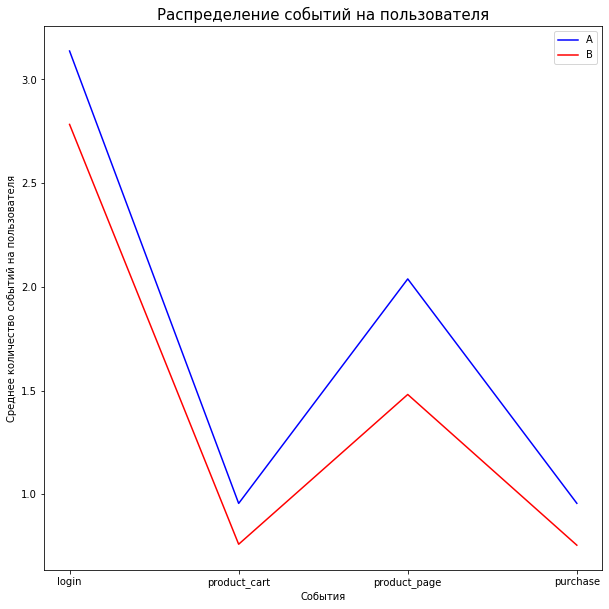

In [69]:
plt.figure(figsize=(10, 10))
plt.plot(final_ab_data_A_pivot_table_mean, label='A', color= 'b')
plt.plot(final_ab_data_B_pivot_table_mean, label='B', color= 'r')
plt.legend()
plt.title('Распределение событий на пользователя', fontsize=15)
plt.ylabel('Среднее количество событий на пользователя')
plt.xlabel('События');

Резких разлийчий в соотношении событий на каждого пользователя не наблюдает. Группы схожи.

### Распределение событий по дням<a id='section_2.553'></a>

Группа А

In [70]:
final_ab_data_A_dop = final_ab_data_A
final_ab_data_A_dop['event_dt'] = final_ab_data_A_dop['event_dt'].dt.date

In [71]:
final_ab_data_A_date = final_ab_data_A_dop.pivot_table(index='user_id', 
                            values = 'event_dt', 
                            aggfunc = 'min').reset_index()

In [72]:
final_ab_data_A_days = final_ab_data_A_date.merge(final_ab_data_A_pivot_table, on='user_id')

In [73]:
final_ab_data_A_days['sum_event'] = (final_ab_data_A_days['login'] + 
                                     final_ab_data_A_days['product_cart'] +
                                     final_ab_data_A_days['product_page'] + 
                                     final_ab_data_A_days['purchase'])

In [74]:
A_days = final_ab_data_A_days.groupby(by='event_dt')['sum_event'].sum()

Группа В

In [75]:
final_ab_data_B_dop = final_ab_data_B
final_ab_data_B_dop['event_dt'] = final_ab_data_B_dop['event_dt'].dt.date

In [76]:
final_ab_data_B_date = final_ab_data_B_dop.pivot_table(index='user_id', 
                            values = 'event_dt', 
                            aggfunc = 'min').reset_index()


In [77]:
final_ab_data_B_days = final_ab_data_B_date.merge(final_ab_data_B_pivot_table, on='user_id')

In [78]:
final_ab_data_B_days['sum_event'] = (final_ab_data_B_days['login'] + 
                                     final_ab_data_B_days['product_cart'] +
                                     final_ab_data_B_days['product_page'] + 
                                     final_ab_data_B_days['purchase'])

In [79]:
B_days = final_ab_data_B_days.groupby(by='event_dt')['sum_event'].sum()

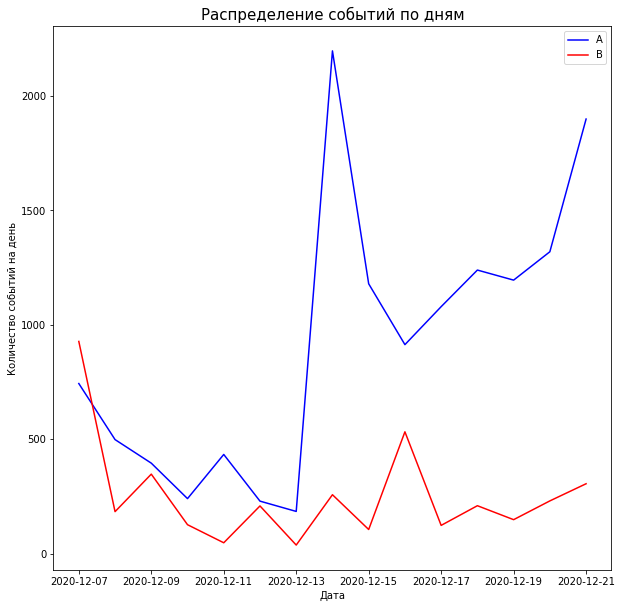

In [80]:
plt.figure(figsize=(10, 10))
plt.plot(A_days, label='A', color= 'b')
plt.plot(B_days, label='B', color= 'r')
plt.legend()
plt.title('Распределение событий по дням', fontsize=15)
plt.ylabel('Количество событий на день')
plt.xlabel('Дата');

Распределение событий по группам схоже до 2020-12-13. После наблюдается резкий скачок количества событий в группе А. Возможно, это связано с выбраным периодом для проведеня теста. Подготовка к рождеству могла вызват увеличение пользовательской активности, которая не характерна в остальное время года.

# Конверсия в воронке на разных этапах <a id='section_2.5'></a>

Воронка по группе А

In [81]:
users_count_A = final_ab_data_A.groupby('event_name').agg({'user_id': 'nunique'})
users_count_A = users_count_A.sort_values(by = 'user_id', ascending=False).reset_index()

Посчитаем доли переходов

In [82]:
users_count_A

,event_name,user_id
0,login,1939
1,product_page,1265
2,purchase,613
3,product_cart,589


In [83]:
final_ab_data_A

,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device
0,831887FE7F2D6CBA,2020-12-07,purchase,4.99,A,recommender_system_test,2020-12-07,eu,android
1,831887FE7F2D6CBA,2020-12-09,purchase,99.99,A,recommender_system_test,2020-12-07,eu,android
2,831887FE7F2D6CBA,2020-12-07,product_cart,0.00,A,recommender_system_test,2020-12-07,eu,android
3,831887FE7F2D6CBA,2020-12-08,product_cart,0.00,A,recommender_system_test,2020-12-07,eu,android
4,831887FE7F2D6CBA,2020-12-09,product_cart,0.00,A,recommender_system_test,2020-12-07,eu,android
...,...,...,...,...,...,...,...,...,...
18794,64597B30278462F5,2020-12-23,login,0.00,A,recommender_system_test,2020-12-21,eu,android
18795,1484BBF124DB1B18,2020-12-21,login,0.00,A,recommender_system_test,2020-12-21,eu,pc
18796,1484BBF124DB1B18,2020-12-22,login,0.00,A,recommender_system_test,2020-12-21,eu,pc
18797,1484BBF124DB1B18,2020-12-27,login,0.00,A,recommender_system_test,2020-12-21,eu,pc


In [84]:
users_A = final_ab_data_A.pivot_table(
    index='user_id', 
    columns='event_name', 
    values='event_dt',
    aggfunc='min')

In [85]:
step_1 = ~users_A['login'].isna()
step_2 = step_1 & (users_A['login'] <= users_A['product_page'])
step_3 =  step_2 & (users_A['product_page'] <= users_A['purchase'])
step_4 = step_3 & (users_A['purchase'] <= users_A['product_cart'])

login_A = step_1.sum()
product_page_A = step_2.sum()
product_cart_A = step_3.sum()
purchase_A = step_4.sum()

print('Авторизовались:', login_A)
print('Зашли на страницу товара:', product_page_A)
print('Оплатили:', product_cart_A)
print('Просмотрели корзину:', purchase_A)

Авторизовались: 1939
Зашли на страницу товара: 1265
Оплатили: 421
Просмотрели корзину: 133


Воронка по группе В

In [86]:
users_count_B = final_ab_data_B.groupby('event_name').agg({'user_id': 'nunique'})
users_count_B = users_count_B.sort_values(by = 'user_id', ascending=False).reset_index()

In [87]:
users_count_B

,event_name,user_id
0,login,655
1,product_page,367
2,purchase,191
3,product_cart,184


In [88]:
users_B = final_ab_data_B.pivot_table(
    index='user_id', 
    columns='event_name', 
    values='event_dt',
    aggfunc='min')

In [89]:
step_1 = ~users_B['login'].isna()
step_2 = step_1 & (users_B['login'] <= users_B['product_page'])
step_3 =  step_2 & (users_B['product_page'] <= users_B['purchase'])
step_4 = step_3 & (users_B['purchase'] <= users_B['product_cart'])

login_B = step_1.sum()
product_page_B = step_2.sum()
product_cart_B = step_3.sum()
purchase_B = step_4.sum()

print('Авторизовались:', login_B)

print('Зашли на страницу товара:', product_page_B)

print('Оплатили:', product_cart_B)

print('Просмотрели корзину:', purchase_B)


Авторизовались: 655
Зашли на страницу товара: 367
Оплатили: 118
Просмотрели корзину: 33


In [90]:
users_count = users_count_A.merge(users_count_B, on='event_name', suffixes=('_A', '_B'))

Простая воронка. Конверсия купивших к авторизовавшимся 

In [91]:
login_count_A = users_count.loc[0,'user_id_A'] 
login_count_B = users_count.loc[0,'user_id_B'] 
purchase_count_A = users_count.loc[2,'user_id_A'] 
purchase_count_B = users_count.loc[2,'user_id_B'] 

In [92]:
conversion_A = purchase_count_A / login_count_A
conversion_B = purchase_count_B / login_count_B
print(conversion_A, conversion_B)

0.31614234141309955 0.2916030534351145


In [93]:
p_combined = (purchase_count_A + purchase_count_B) / (login_count_A + login_count_B)
difference = conversion_A - conversion_B

z_value = difference / np.sqrt(p_combined * (1 - p_combined) * (1/login_count_A  + 1/login_count_B))

distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < ALPHA:
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

p-значение:  0.24035836270660704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [94]:
conversion_dev = (conversion_B / conversion_A - 1).round(3) * 100
print(f"Относительное изменение конверсии группы В к А: {conversion_dev}%")

Относительное изменение конверсии группы В к А: -7.8%


Воронка с учётом последовательности 

In [95]:
conversion_A = purchase_A / login_A
conversion_B = purchase_B / login_B
print(conversion_A, conversion_B)

0.06859205776173286 0.050381679389312976


In [96]:
p_combined = (purchase_A + purchase_A) / (login_A + login_B)
difference = conversion_A - conversion_B

z_value = difference / np.sqrt(p_combined * (1 - p_combined) * (1/login_A  + 1/login_B))

distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < ALPHA:
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

p-значение:  0.18409413859086343
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [97]:
conversion_dev = (conversion_B / conversion_A - 1).round(3) * 100
print(f"Относительное изменение конверсии  группы В к А: {conversion_dev}%")

Относительное изменение конверсии  группы В к А: -26.5%


В обоих случаях происходит снижение конверсии к покупкам на 8-26,5%. Что говорит, о понижении количества клиентов проходящих путь продуктовой воронки

### Визуализация воронки <a id='section_33333'></a>

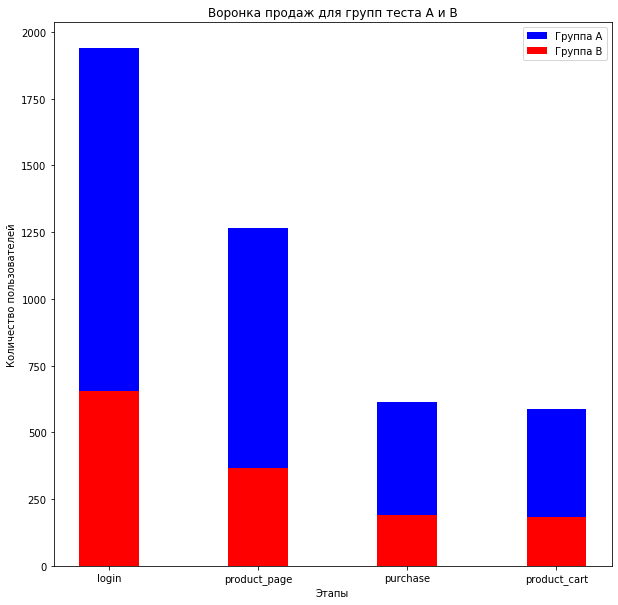

In [98]:
fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.bar(users_count['event_name'], 
                users_count['user_id_A'], 
                color='b', 
                label='Группа А',width=0.4)
rects2 = ax.bar(users_count['event_name'], 
                users_count['user_id_B'], 
                color='r', 
                label='Группа В',width=0.4)
ax.set_title('Воронка продаж для групп теста А и В')
ax.set_xlabel('Этапы')
ax.set_ylabel('Количество пользователей')
ax.legend();

# Анализ A/B-теста <a id='section_3'></a>

## Выделение данных для метрик <a id='section_3.1'></a>

Покупки

In [99]:
final_ab_data_purchase =final_ab_data.query('event_name == "purchase"') 

In [100]:
final_ab_data_purchase.head()

,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test,2020-12-07,eu,android
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,A,recommender_system_test,2020-12-07,eu,android
8,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,A,recommender_system_test,2020-12-07,eu,pc
11,49EA242586C87836,2020-12-07 06:31:24,purchase,99.99,B,recommender_system_test,2020-12-07,eu,iphone
12,49EA242586C87836,2020-12-09 15:39:47,purchase,9.99,B,recommender_system_test,2020-12-07,eu,iphone


In [101]:
final_ab_data_purchase['event_dt'] = final_ab_data_purchase['event_dt'].dt.date

In [102]:
datagroup_purchase = final_ab_data_purchase[['event_dt','group']].drop_duplicates()

In [103]:
select_final_ab_data_purchase = (datagroup_purchase
                                 .apply(lambda x: final_ab_data_purchase
                                        [np.logical_and(final_ab_data_purchase['event_dt'] <= x['event_dt'], 
                                                        final_ab_data_purchase['group'] == x['group'])]
                                        .agg({'event_dt':'max', 
                                              'group':'max',
                                              'user_id':pd.Series.nunique,
                                              'details':'sum'}), axis=1)
                                 .sort_values(by=['event_dt','group']))

In [104]:
select_final_ab_data_purchase = (select_final_ab_data_purchase
                                 .reset_index()
                                 .drop('index', axis=1))

In [105]:
select_final_ab_data_purchase = (select_final_ab_data_purchase
                                 .rename(columns={'event_dt' : 'date', 
                                                  'user_id':'user_count_purchase', 
                                                  'details':'revenue'}))

In [106]:
select_final_ab_data_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
date                   46 non-null object
group                  46 non-null object
user_count_purchase    46 non-null int64
revenue                46 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ KB


Просмотры корзины

In [107]:
final_ab_data_product_cart =final_ab_data.query('event_name == "product_cart"') 

In [108]:
final_ab_data_product_cart.head()

,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.0,A,recommender_system_test,2020-12-07,eu,android
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.0,A,recommender_system_test,2020-12-07,eu,android
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.0,A,recommender_system_test,2020-12-07,eu,android
28,A640F31CAC7823A6,2020-12-07 18:48:27,product_cart,0.0,B,recommender_system_test,2020-12-07,eu,pc
29,A640F31CAC7823A6,2020-12-15 10:22:28,product_cart,0.0,B,recommender_system_test,2020-12-07,eu,pc


In [109]:
final_ab_data_product_cart['event_dt'] = final_ab_data_product_cart['event_dt'].dt.date

In [110]:
datagroup_product_cart = final_ab_data_product_cart[['event_dt','group']].drop_duplicates()

In [111]:
select_final_ab_data_product_cart = (datagroup_product_cart
                                 .apply(lambda x: final_ab_data_product_cart
                                        [np.logical_and(final_ab_data_product_cart['event_dt'] <= x['event_dt'], 
                                                        final_ab_data_product_cart['group'] == x['group'])]
                                        .agg({'event_dt':'max', 
                                              'group':'max',
                                              'user_id':pd.Series.nunique}), axis=1)
                                 .sort_values(by=['event_dt','group']))

In [112]:
select_final_ab_data_product_cart = (select_final_ab_data_product_cart
                                 .reset_index()
                                 .drop('index', axis=1))

In [113]:
select_final_ab_data_product_cart = (select_final_ab_data_product_cart
                                 .rename(columns={'event_dt' : 'date', 
                                                  'user_id':'user_count_product_cart'}))

In [114]:
select_final_ab_data_product_cart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
date                       47 non-null object
group                      47 non-null object
user_count_product_cart    47 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.2+ KB


Просмотр карточек товаров

In [115]:
final_ab_data_product_page =final_ab_data.query('event_name == "product_page"') 

In [116]:
final_ab_data_product_page['event_dt'] = final_ab_data_product_page['event_dt'].dt.date

In [117]:
datagroup_product_page = final_ab_data_product_page[['event_dt','group']].drop_duplicates()

In [118]:
select_final_ab_data_product_page = (datagroup_product_page
                                 .apply(lambda x: final_ab_data_product_page
                                        [np.logical_and(final_ab_data_product_page['event_dt'] <= x['event_dt'], 
                                                        final_ab_data_product_page['group'] == x['group'])]
                                        .agg({'event_dt':'max', 
                                              'group':'max',
                                              'user_id':pd.Series.nunique}), axis=1)
                                 .sort_values(by=['event_dt','group']))

In [119]:
select_final_ab_data_product_page = (select_final_ab_data_product_page
                                 .reset_index()
                                 .drop('index', axis=1))

In [120]:
select_final_ab_data_product_page = (select_final_ab_data_product_page
                                 .rename(columns={'event_dt' : 'date', 
                                                  'user_id':'user_count_product_page'}))

In [121]:
select_final_ab_data_product_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
date                       46 non-null object
group                      46 non-null object
user_count_product_page    46 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.2+ KB


Авторизация

In [122]:
final_ab_data_login =final_ab_data.query('event_name == "login"') 

In [123]:
final_ab_data_login['event_dt'] = final_ab_data_login['event_dt'].dt.date

In [124]:
datagroup_login = final_ab_data_login[['event_dt','group']].drop_duplicates()

In [125]:
select_final_ab_data_login= (datagroup_login
                                 .apply(lambda x: final_ab_data_login
                                        [np.logical_and(final_ab_data_login['event_dt'] <= x['event_dt'], 
                                                        final_ab_data_login['group'] == x['group'])]
                                        .agg({'event_dt':'max', 
                                              'group':'max',
                                              'user_id':pd.Series.nunique}), axis=1)
                                 .sort_values(by=['event_dt','group']))

In [126]:
select_final_ab_data_login = (select_final_ab_data_login
                                 .reset_index()
                                 .drop('index', axis=1))

In [127]:
select_final_ab_data_login = (select_final_ab_data_login
                                 .rename(columns={'event_dt' : 'date', 
                                                  'user_id':'user_count_login'}))

In [128]:
select_final_ab_data_login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
date                47 non-null object
group               47 non-null object
user_count_login    47 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.2+ KB


Объединим таблицы для получения сводной таблицы по кумулятивным данным

In [129]:
cumulativedata = pd.merge(select_final_ab_data_purchase, select_final_ab_data_product_page,on=['date','group'])

In [130]:
cumulativedata = pd.merge(cumulativedata, select_final_ab_data_product_cart,on=['date','group'])

In [131]:
cumulativedata = pd.merge(cumulativedata, select_final_ab_data_login,on=['date','group'])

In [132]:
cumulativedata.head()

,date,group,user_count_purchase,revenue,user_count_product_page,user_count_product_cart,user_count_login
0,2020-12-07,A,27,634.73,66,25,103
1,2020-12-07,B,47,639.53,76,31,114
2,2020-12-08,A,45,1344.47,113,45,170
3,2020-12-08,B,52,974.29,89,41,149
4,2020-12-09,A,64,2059.08,147,60,227


### Выделим кумулятивные данные по каждой группе  <a id='section_3.2'></a>

In [133]:
cumul_A = (cumulativedata[cumulativedata['group'] == 'A']
           [['date',
             'user_count_purchase', 
             'user_count_product_page', 
             'user_count_product_cart',
             'user_count_login',
             'revenue']])
cumul_B = (cumulativedata[cumulativedata['group'] == 'B']
           [['date','user_count_purchase', 
             'user_count_product_page', 
             'user_count_product_cart',
             'user_count_login', 
             'revenue']])


### Построение графика по выручке <a id='section_3.3'></a>

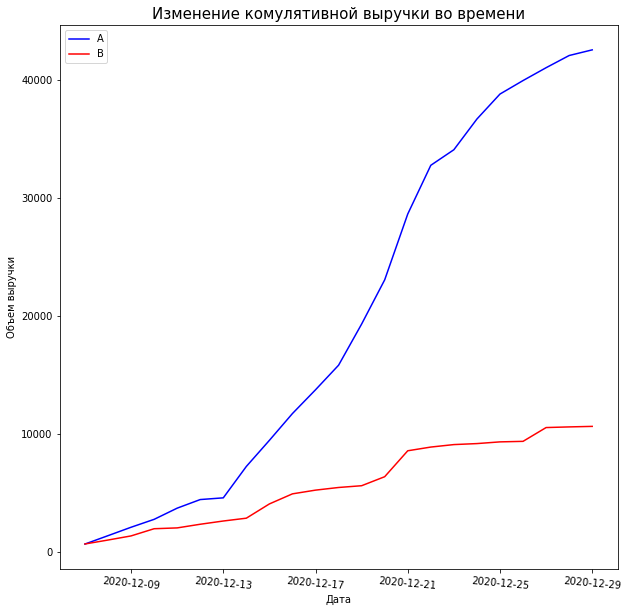

In [134]:
plt.figure(figsize=(10, 10))
plt.plot(cumul_A['date'],cumul_A['revenue'], label='A', color= 'b')
plt.plot(cumul_B['date'],cumul_B['revenue'], label='B', color= 'r')
plt.legend()
plt.title('Изменение комулятивной выручки во времени', fontsize=15)
plt.ylabel('Объем выручки')
plt.xlabel('Дата')
plt.xticks(rotation=-5);

Выручка группы A увеличивается равномерно до 13.12.2020, после происходит резкий рост выручуки. Выручка группы B увеличивается равномерно втечении всего теста. Возможно, это связано, приготвлениями к праздникам, но вызывает вопрос такое различие в данныхю.

### Построение графика по среднему чеку <a id='section_3.5'></a>

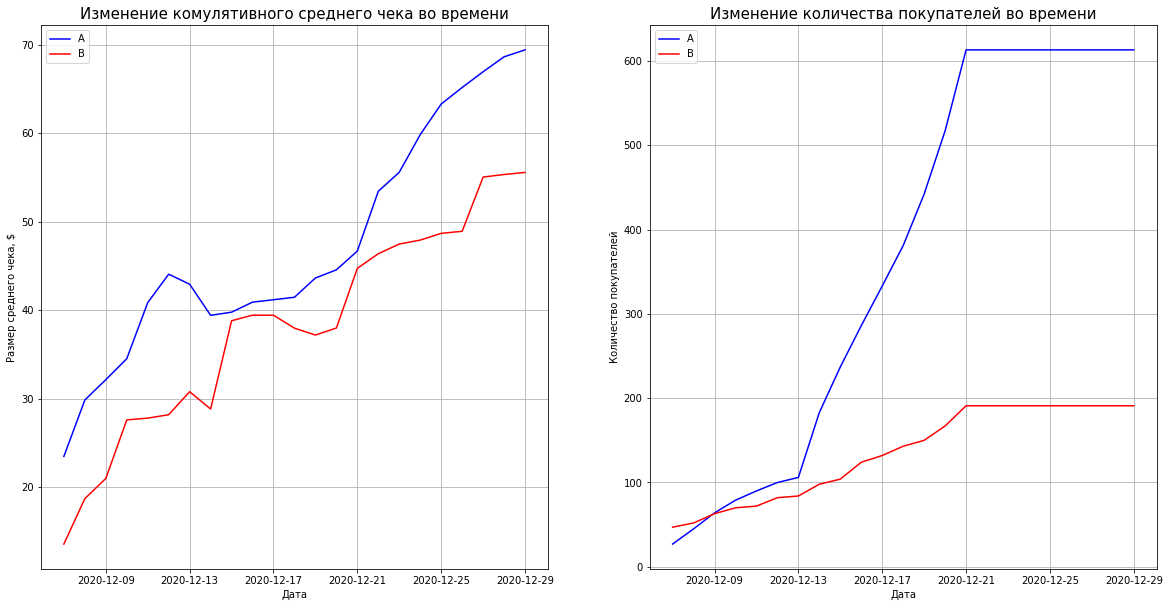

In [135]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(cumul_A['date'], 
         cumul_A['revenue']/cumul_A['user_count_purchase'],
         label='A', color='b')
plt.plot(cumul_B['date'], 
         cumul_B['revenue']/cumul_B['user_count_purchase'],
         label='B', 
         color='r')
plt.legend()
plt.title('Изменение комулятивного среднего чека во времени',\
          fontsize=15)
plt.grid()
plt.ylabel('Размер среднего чека, $')
plt.xlabel('Дата')

plt.subplot(1, 2, 2)
plt.plot(cumul_A['date'], 
         cumul_A['user_count_purchase'],
         label='A', color='b')
plt.plot(cumul_B['date'], 
         cumul_B['user_count_purchase'],
         label='B', 
         color='r')
plt.legend()
plt.title('Изменение количества покупателей во времени',\
          fontsize=15)
plt.ylabel('Количество покупателей')
plt.xlabel('Дата')

plt.grid();

Изменения среднего чека имеют сходную тенденцию в группах теста - происходит увеличение размера среднего чека. Но при этом руппа В на протяжении опыта имеет более низкие показатели. С 2020-12-13 до 2020-12-21 происходит аномально быстрый рост количества клиентов в группе А, что могло вызвать изменение среднего чека.

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A <a id='section_3.6'></a>

In [136]:
cumul_merge = cumul_A.merge(cumul_B, 
                            on=['date'], 
                            how='left', 
                            suffixes=['A', 'B'])
cumul_merge.head()

,date,user_count_purchaseA,user_count_product_pageA,user_count_product_cartA,user_count_loginA,revenueA,user_count_purchaseB,user_count_product_pageB,user_count_product_cartB,user_count_loginB,revenueB
0,2020-12-07,27,66,25,103,634.73,47,76,31,114,639.53
1,2020-12-08,45,113,45,170,1344.47,52,89,41,149,974.29
2,2020-12-09,64,147,60,227,2059.08,63,123,58,205,1324.02
3,2020-12-10,79,171,73,273,2728.74,70,134,63,234,1933.82
4,2020-12-11,90,208,95,343,3678.43,72,140,66,247,2003.71


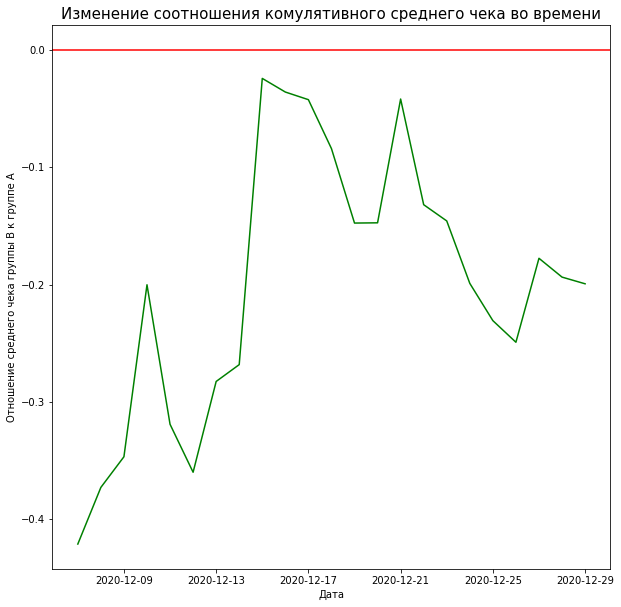

In [137]:
plt.figure(figsize=(10, 10))
plt.plot(cumul_merge['date'],
         (((cumul_merge['revenueB']/cumul_merge['user_count_purchaseB'])/
           (cumul_merge['revenueA']/cumul_merge['user_count_purchaseA']))-1), color='g')
plt.axhline(y=0, color='red', linestyle='-')
plt.title('Изменение соотношения комулятивного среднего чека во времени',\
          fontsize=15)
plt.ylabel('Отношение среднего чека группы В к группе А')
plt.xlabel('Дата');

Здесь также можно увидеть значительно увеличение среднего чека группы А над средним чеком группы В, кроме периода резкого роста количества клиентов в группе А (с 2020-12-13 до 2020-12-21), происходит понижение соотношения среднего чека, и становит близким у обеих групп.

### Расчёт и график кумулятивной конверсии по группам <a id='section_3.7'></a>

In [138]:
cumul_A['conversion'] = cumul_A['user_count_purchase']/cumul_A['user_count_login']
cumul_B['conversion'] = cumul_B['user_count_purchase']/cumul_B['user_count_login']

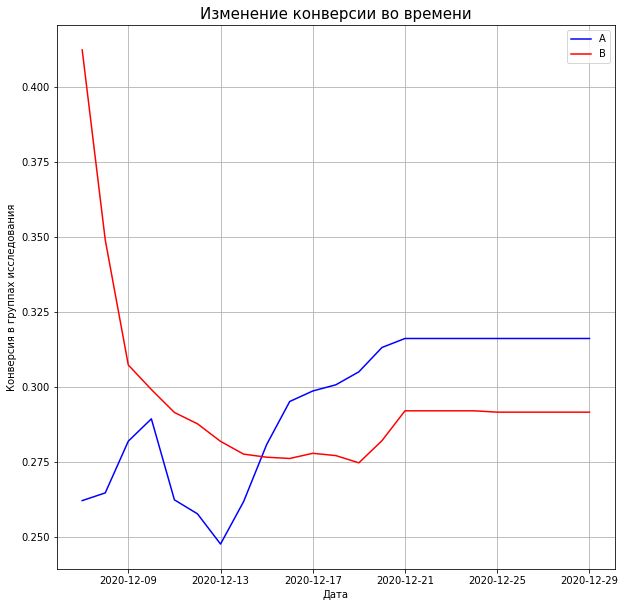

In [139]:
plt.figure(figsize=(10, 10))
plt.plot(cumul_A['date'], 
         cumul_A['conversion'],
         label='A', 
         color='b')
plt.plot(cumul_B['date'], 
         cumul_B['conversion'],
         label='B', 
         color='r')
plt.legend()
plt.title('Изменение конверсии во времени',
          fontsize=15)
plt.ylabel('Конверсия в группах исследования')
plt.grid()
plt.xlabel('Дата');

По графику видно, что обе группы вначале теряют в конвверсии к покупкам. Группа В с 2020-12-21 выходит на плато и имеет конверсию на уровне 0.29, в тоже время в группе А, в результате притока большого количества клиентов, происходит увеличение конверсии на уровне 0.32.

### График относительного изменения кумулятивной конверсии группы B к группе A  <a id='section_3.8'></a>

Объединим данные по конверсии в группе


In [140]:
cumul_merge_conversion = (cumul_A[['date','conversion']]
                        .merge(cumul_B[['date','conversion']],\
                               on='date', suffixes=['A','B']))
cumul_merge_conversion.head()

,date,conversionA,conversionB
0,2020-12-07,0.262136,0.412281
1,2020-12-08,0.264706,0.348993
2,2020-12-09,0.281938,0.307317
3,2020-12-10,0.289377,0.299145
4,2020-12-11,0.262391,0.291498


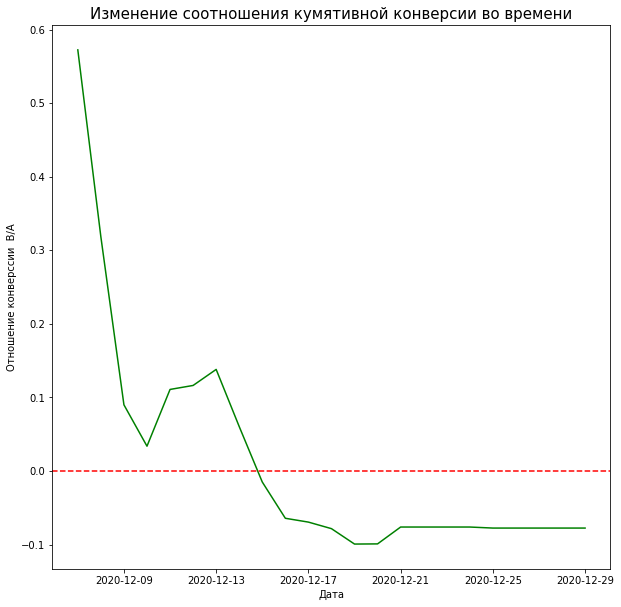

In [141]:
plt.figure(figsize=(10, 10))
plt.plot(cumul_merge_conversion['date'],
         (cumul_merge_conversion['conversionB']/cumul_merge_conversion['conversionA'])-1, 
         color='g')
plt.title('Изменение соотношения кумятивной конверсии во времени', fontsize=15)
plt.ylabel('Отношение конверссии  B/A')
plt.xlabel('Дата')
plt.axhline(y=0, color='red', linestyle='--');

Сходная динамика наблюдается прри построении графика соотношения кумулятивной конверсии, перелом в ситуации наблюдается в период резкого повышения количества клиентов в группе А.

### Статистическая значимость различий в среднем чеке между группами <a id='section_3.9'></a>

In [142]:
cumul_merge_mean_chek_B = cumul_merge['revenueB']
cumul_merge_mean_chek_A = cumul_merge['revenueA']


Расчитаем значение критерия Шапиро-Уилка и определим принадлежность распределения к нормальному.


In [143]:
resultA = st.shapiro(cumul_merge_mean_chek_B)
p_valueA = resultA[1]
if p_valueA < ALPHA:
    print(f"Отвергаем нулевую гипотезу: распределение не нормально. p={p_valueA}")
else:
    print(f"Не получилось отвергнуть нулевую гипотезу, всё нормально. p={p_valueA}")

Отвергаем нулевую гипотезу: распределение не нормально. p=0.027357393875718117


In [144]:
resultB = st.shapiro(cumul_merge_mean_chek_A)
p_valueB = resultB[1]
if p_valueB < ALPHA:
    print(f"Отвергаем нулевую гипотезу: распределение не нормально. p={p_valueB}")
else:
    print(f"Не получилось отвергнуть нулевую гипотезу, всё нормально. p={p_valueB}")

Отвергаем нулевую гипотезу: распределение не нормально. p=0.007296720519661903


Т.к. выборки распределены не нормально, используем для сравнения критерий Манна-Уитни

In [145]:
resultsAB = st.mannwhitneyu(cumul_merge_mean_chek_B,
                            cumul_merge_mean_chek_A)
p_valueAB = resultsAB[1]
if p_valueAB < ALPHA:
    print(f"Отвергаем нулевую гипотезу: разница статистически значима. p={(p_valueAB).round(10)}")
else:
    print(f"Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя. p={(p_valueAB).round(10)}")

Отвергаем нулевую гипотезу: разница статистически значима. p=0.0018662191


In [146]:
revenue_rev = (cumul_merge_mean_chek_B.mean() / cumul_merge_mean_chek_A.mean() - 1).round(3) * 100
print(f"Относительное изменение среднего чека группы В к А: {revenue_rev}%")

Относительное изменение среднего чека группы В к А: -71.0%


Средний чек в группах значительно различается и в группе В он ниже на 71% по отношению к группе А.

### Статистическая значимость различий в конверсии между группами <a id='section_3.10'></a>

Расчитаем значение критерия Шапиро-Уилка и определим принадлежность распределения к нормальному.


In [147]:
resultA = st.shapiro(cumul_merge_conversion['conversionA'])
p_valueA = resultA[1]
if p_valueA < ALPHA:
    print(f"Отвергаем нулевую гипотезу: распределение не нормально. p={p_valueA}")
else:
    print(f"Не получилось отвергнуть нулевую гипотезу, всё нормально. p={p_valueA}")

Отвергаем нулевую гипотезу: распределение не нормально. p=0.0010169149609282613


In [148]:
resultB = st.shapiro(cumul_merge_conversion['conversionB'])
p_valueB = resultB[1]
if p_valueB < ALPHA:
    print(f"Отвергаем нулевую гипотезу: распределение не нормально. p={p_valueB}")
else:
    print(f"Не получилось отвергнуть нулевую гипотезу, всё нормально. p={p_valueB}")

Отвергаем нулевую гипотезу: распределение не нормально. p=4.2522543708400917e-07


Т.к. выборки распределены не нормально, используем для сравнения критерий Манна-Уитни

In [149]:
resultsAB = st.mannwhitneyu(cumul_merge_conversion['conversionA'],
                            cumul_merge_conversion['conversionB'])
p_valueAB = resultsAB[1]
if p_valueAB < ALPHA:
    print(f"Отвергаем нулевую гипотезу: разница статистически значима. p={(p_valueAB).round(10)}")
else:
    print(f"Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя. p={(p_valueAB).round(10)}")

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя. p=0.1603019189


In [150]:
revenue_rev = (cumul_merge_conversion['conversionB'].mean() / cumul_merge_conversion['conversionA'].mean() - 1).round(3) * 100
print(f"Относительное изменение конверсии группы В к А: {revenue_rev}%")

Относительное изменение конверсии группы В к А: 0.5%


Среднее соотношений конверсий в группах В к А составляет всего -0,5%, и не является достоверным изменением.

# Заключение <a id='section_4'></a>

###### Анализ результатов

* В целом, изменения применяемые в группе В приводят к снижению конверсии клиентов к покупкам. Т.о. снижается количество людей дошедших до этапа покупки товаров.
* Изменения среднего чека иемют сходную тенденцию в группах теста - происходит увеличение размера среднего чека. При этом группа А значительно опережает группу В (в среднем на 70%)

Результаты указывают на то, что **тест нельзя считать успешным**, т.к. недостигнуты ключевые ожидаемые эффекты.

###### Основными проблемами проведенного теста являются выбранное времяб нарушение отбора пользователей, и количество пользователей в группах

* В датасете было представлено значительно количество данных не относящихся или некорректных по отношению к тесту. Так были представлены данные из другого теста и данные из других регионов. Они были удалены из датасета и не использовались при оценке А/Б теста. 

* В период с 7.12 по 4.01 пользовательская активность может меняться. Такой тест имел бы место, если бы иследовалось поведение конкретно в этот, период, но об этом нет явного указания в ТЗ. 

* Группы представлены не равномерно, группа В занимает только 25% от всей выборки теста. Такое распределение может сильно сказываться на результатах теста, приводя к неверным выводам.

* Вызывает вопрос резкий рост количества клиентов в период с 2020-12-13 до 2020-12-21 в группе А. 

На данный момент, **тест нельзя считать корректным**. Большое количество нарушений не пзволяет считать выводы достоверными.

[К оглавлению](#section_0)